In [75]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import scipy.cluster.hierarchy as clust
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
reads = pd.read_csv('../InputData/Chymera/Chymera.csv', index_col=0, sep=',')
reads.columns
#reads[(reads['gene1'] == "NT")]

Index(['ID', 'Library', 'gene1', 'gene2', 'Cas9.Target.Site',
       'Cas9.Guide.Source', 'Cas9.Guide', 'Cas9.Guide.Type',
       'Cpf1.Target.Site', 'Cpf1.Guide', 'Cpf1.Guide.Type', 'CNN.Score',
       'HAP1.Torin.T12A', 'HAP1.Torin.T12B', 'HAP1.Torin.T12C',
       'HAP1.Torin.T18A', 'HAP1.Torin.T18B', 'HAP1.Torin.T18C', 'RPE1.T18A',
       'RPE1.T18B', 'RPE1.T18C', 'RPE1.T24A', 'RPE1.T24B', 'RPE1.T24C',
       'HAP1.T12A', 'HAP1.T12B', 'HAP1.T12C', 'HAP1.T18A', 'HAP1.T18B',
       'HAP1.T18C', 'HAP1.T0', 'RPE1.T0'],
      dtype='object')

In [77]:
reads = reads[[ 'gene1', 'gene2', 'RPE1.T18A',
       'RPE1.T18B', 'RPE1.T18C', 'RPE1.T24A',
       'RPE1.T24B', 'RPE1.T24C',  'RPE1.T0']] # remove early time points too as we dont need them
reads


,gene1,gene2,RPE1.T18A,RPE1.T18B,RPE1.T18C,RPE1.T24A,RPE1.T24B,RPE1.T24C,RPE1.T0
Column1,,,,,,,,,
1,RPL4,NaN,0,0,0,0,0,0,21
2,RPL4,NaN,0,0,3,1,0,1,68
3,RPL4,NaN,0,1,5,1,0,0,80
4,RPL4,NegControl,23,1,7,2,0,17,33
5,RPL4,NaN,18,1,15,4,1,26,160
...,...,...,...,...,...,...,...,...,...
92742,RBM41,NegControl,130,146,115,174,282,155,147
92743,RBM41,NegControl,34,54,46,51,35,35,14
92744,RBM41,NegControl,32,25,24,36,12,19,26


In [78]:
reads = reads[(pd.notna(reads['gene1'] )) & (pd.notna(reads['gene2']))]
reads.shape


(63766, 9)

In [79]:
reads = reads[(reads['gene1'] != "NT") & (reads['gene2'] != "NT")]
## Remove NTs too
reads.shape
bothNegs = reads[((reads['gene1'] == 'NegControl') & (reads['gene2'] == 'NegControl'))]
#bothNegs.Library.unique()
## also remove rows where both are 
reads = reads[~((reads['gene1'] == 'NegControl') & (reads['gene2'] == 'NegControl'))]
reads.shape

(58589, 9)

In [80]:
numGuides, numSamples = reads.shape

numGuides, numSamples 

reads.head(10)

,gene1,gene2,RPE1.T18A,RPE1.T18B,RPE1.T18C,RPE1.T24A,RPE1.T24B,RPE1.T24C,RPE1.T0
Column1,,,,,,,,,
4,RPL4,NegControl,23,1,7,2,0,17,33
8,RPL4,NegControl,204,10,35,265,9,91,41
9,NegControl,RPL4,105,64,60,123,29,65,89
10,NegControl,RPL4,49,1,13,42,0,12,33
11,NegControl,RPL4,15,25,8,8,6,3,35
16,GAPDH,NegControl,2,5,5,0,19,1,50
20,GAPDH,NegControl,6,2,6,0,1,2,26
21,NegControl,GAPDH,2,0,0,1,0,0,22
22,NegControl,GAPDH,26,4,1,26,6,0,30


In [81]:
sample_sum = reads.iloc[:,range(2,numSamples)].sum(0)
sample_sum

RPE1.T18A    9091978
RPE1.T18B    8439930
RPE1.T18C    6524622
RPE1.T24A    9641208
RPE1.T24B    7872266
RPE1.T24C    9515636
RPE1.T0      5663026
dtype: int64

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Hamda\anaconda3New\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['std', 'percentile', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


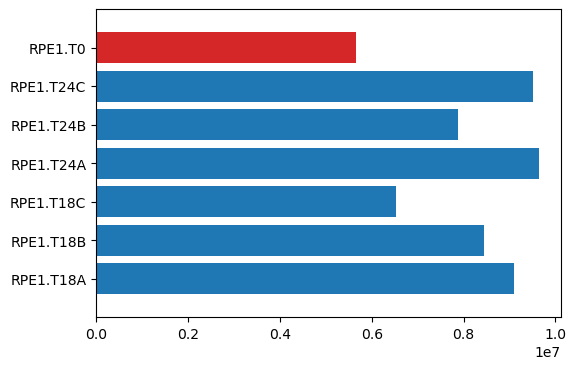

In [82]:
import matplotlib.pyplot as plt
%pylab inline
highlight_index = -1
colors = ['tab:blue'] * len(sample_sum)
colors[highlight_index] = 'tab:red'
figure(figsize = (6,4))
barh( arange(len(sample_sum)), sample_sum, align='center', color = colors)
ylim(-1, len(sample_sum)) # len(sample_sum) = 10
yticks(arange(len(sample_sum)), reads.columns.values[2:], rotation=0)

show()

In [83]:
pseudo=5
reads[reads.columns[2:]] = reads[reads.columns[2:]] + pseudo


In [84]:
meanReads = reads.iloc[:,range(2,numSamples)].mean(0) # colmean
meanReads

RPE1.T18A    160.182338
RPE1.T18B    149.053150
RPE1.T18C    116.362577
RPE1.T24A    169.556623
RPE1.T24B    139.364232
RPE1.T24C    167.413354
RPE1.T0      101.656813
dtype: float64

In [85]:
numGuides, numSamples = reads.shape

numGuides, numSamples 

(58589, 9)

In [86]:
reads['GENE'] = reads.apply(lambda row: f"{row['gene1']}|{row['gene2']}", axis=1)
reads
reads.drop(['gene1', 'gene2'], axis = 1, inplace = True)

In [87]:
reads = reads[['GENE', 'RPE1.T18A', 'RPE1.T18B', 'RPE1.T18C','RPE1.T24A', 'RPE1.T24B', 'RPE1.T24C',  'RPE1.T0']]
reads


,GENE,RPE1.T18A,RPE1.T18B,RPE1.T18C,RPE1.T24A,RPE1.T24B,RPE1.T24C,RPE1.T0
Column1,,,,,,,,
4,RPL4|NegControl,28,6,12,7,5,22,38
8,RPL4|NegControl,209,15,40,270,14,96,46
9,NegControl|RPL4,110,69,65,128,34,70,94
10,NegControl|RPL4,54,6,18,47,5,17,38
11,NegControl|RPL4,20,30,13,13,11,8,40
...,...,...,...,...,...,...,...,...
92742,RBM41|NegControl,135,151,120,179,287,160,152
92743,RBM41|NegControl,39,59,51,56,40,40,19
92744,RBM41|NegControl,37,30,29,41,17,24,31


In [88]:
numGuides, numSamples = reads.shape

numGuides, numSamples 
normed = pd.DataFrame(index=reads.index, columns=reads.columns) # empty data frame
normed['GENE'] = reads.iloc[:, 0]

normed[ normed.columns[1:] ] =   (reads.iloc[:, range(1, numSamples)] ) / np.tile(meanReads.values, [numGuides, 1]) * 500  # normalize to mean 500 read
normed.head()

,GENE,RPE1.T18A,RPE1.T18B,RPE1.T18C,RPE1.T24A,RPE1.T24B,RPE1.T24C,RPE1.T0
Column1,,,,,,,,
4,RPL4|NegControl,87.400397,20.127049,51.562970,20.642072,17.938606,65.705631,186.903361
8,RPL4|NegControl,652.381538,50.317622,171.876565,796.194200,50.228096,286.715479,226.251437
9,NegControl|RPL4,343.358704,231.461060,279.299419,377.455028,121.982518,209.063370,462.339894
10,NegControl|RPL4,168.557909,20.127049,77.344454,138.596768,17.938606,50.772533,186.903361
11,NegControl|RPL4,62.428855,100.635243,55.859884,38.335276,39.464932,23.892957,196.740380


In [89]:
fc = pd.DataFrame(index=reads.index, columns=reads.columns[reads.columns != 'RPE1.T0'])#non-normalised
fc['GENE'] = reads['GENE']  # first column is gene name
fc
numFCsamples = fc.shape[1]-1   # number of columns for which to calculate FC
numFCsamples
#fc.head()
pseudo = 0 # remmeber pseudocount is already in the data 
fc.head()
#normed.columns
#fc = fc[['GENE', 'RPE1.T18A', 'RPE1.T18B', 'RPE1.T18C']]


,GENE,RPE1.T18A,RPE1.T18B,RPE1.T18C,RPE1.T24A,RPE1.T24B,RPE1.T24C
Column1,,,,,,,
4,RPL4|NegControl,NaN,NaN,NaN,NaN,NaN,NaN
8,RPL4|NegControl,NaN,NaN,NaN,NaN,NaN,NaN
9,NegControl|RPL4,NaN,NaN,NaN,NaN,NaN,NaN
10,NegControl|RPL4,NaN,NaN,NaN,NaN,NaN,NaN
11,NegControl|RPL4,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
fc[ fc.columns[1:] ] = log2( (normed[ normed.columns[1:-1]] + pseudo) / np.tile( normed[ normed.columns[-1]] + pseudo , [numFCsamples, 1]).T )
fc

,GENE,RPE1.T18A,RPE1.T18B,RPE1.T18C,RPE1.T24A,RPE1.T24B,RPE1.T24C
Column1,,,,,,,
4,RPL4|NegControl,-1.096581,-3.215085,-1.857885,-3.178633,-3.381153,-1.508204
8,RPL4|NegControl,1.527789,-2.168791,-0.396554,1.815193,-2.171360,0.341693
9,NegControl|RPL4,-0.429237,-0.998184,-0.727141,-0.292649,-1.922279,-1.145014
10,NegControl|RPL4,-0.149048,-3.215085,-1.272923,-0.431399,-3.381153,-1.880172
11,NegControl|RPL4,-1.656008,-0.967157,-1.816409,-2.359549,-2.317650,-3.041636
...,...,...,...,...,...,...,...
92742,RBM41|NegControl,-0.827120,-0.561643,-0.535957,-0.502172,0.461826,-0.645707
92743,RBM41|NegControl,0.381467,1.082596,1.229578,0.821367,0.618847,0.354293
92744,RBM41|NegControl,-0.400751,-0.599426,-0.291136,-0.334705,-1.321887,-1.088942


In [91]:
## Anything with NegControl  is control in this study
fc_base = pd.DataFrame(index=fc.index, columns=fc.columns) # non-normalised
fc_base.iloc[:] = fc.iloc[:]
fc_base
fc_base[['GENE1', 'GENE2']] = fc_base.GENE.str.split("|", expand = True)
fc_base.drop(['GENE'], inplace = True,axis=1)
fc_base
fc_base.loc[fc_base['GENE1'].str.contains('NegControl'), 'GENE1'] = 'control'
fc_base.loc[fc_base['GENE2'].str.contains('NegControl'),'GENE2'] = 'control'

fc_base

,RPE1.T18A,RPE1.T18B,RPE1.T18C,RPE1.T24A,RPE1.T24B,RPE1.T24C,GENE1,GENE2
Column1,,,,,,,,
4,-1.096581,-3.215085,-1.857885,-3.178633,-3.381153,-1.508204,RPL4,control
8,1.527789,-2.168791,-0.396554,1.815193,-2.17136,0.341693,RPL4,control
9,-0.429237,-0.998184,-0.727141,-0.292649,-1.922279,-1.145014,control,RPL4
10,-0.149048,-3.215085,-1.272923,-0.431399,-3.381153,-1.880172,control,RPL4
11,-1.656008,-0.967157,-1.816409,-2.359549,-2.31765,-3.041636,control,RPL4
...,...,...,...,...,...,...,...,...
92742,-0.82712,-0.561643,-0.535957,-0.502172,0.461826,-0.645707,RBM41,control
92743,0.381467,1.082596,1.229578,0.821367,0.618847,0.354293,RBM41,control
92744,-0.400751,-0.599426,-0.291136,-0.334705,-1.321887,-1.088942,RBM41,control


In [92]:
cells = list([ 'RPE1.T18', 'RPE1.T24'])
cols = list(['GENE1']) + list( ['GENE2']) + cells
cols
fc_merge = pd.DataFrame( columns=cols, index=fc_base.index, dtype=float)
fc_merge.GENE1 = fc_base.GENE1
fc_merge.GENE2 = fc_base.GENE2
fc_merge
for cell in cells:
    samples = [x for x in fc_base.columns if cell in x]
    fc_merge[cell] = fc[ samples ].mean(1)

fc_merge

,GENE1,GENE2,RPE1.T18,RPE1.T24
Column1,,,,
4,RPL4,control,-2.056517,-2.689330
8,RPL4,control,-0.345852,-0.004825
9,control,RPL4,-0.718188,-1.119981
10,control,RPL4,-1.545685,-1.897575
11,control,RPL4,-1.479858,-2.572945
...,...,...,...,...
92742,RBM41,control,-0.641573,-0.228684
92743,RBM41,control,0.897880,0.598169
92744,RBM41,control,-0.430437,-0.915178


In [93]:
is_ctrl = where( (fc_merge.GENE1=='control') | (fc_merge.GENE2=='control') )[0]

is_ctrl1 = where( fc_merge.GENE1=='control' )[0]
is_ctrl2 = where( fc_merge.GENE2=='control' )[0]


smf_gene1 = fc_merge.iloc[is_ctrl2].groupby('GENE1').mean(numeric_only = True) # calculate means of multiple runs of same gene
smf_gene2 = fc_merge.iloc[is_ctrl1].groupby('GENE2').mean(numeric_only = True)


smf_guide1 = fc_merge.iloc[is_ctrl2].groupby('GENE1')
smf_guide2 = fc_merge.iloc[is_ctrl1].groupby('GENE2')

In [94]:
smf_gene = smf_gene1.join(smf_gene2, lsuffix='_Aposn', rsuffix='_Bposn')
smf_gene # so this dataset has CTRL-GENE as A_549_Bposn and GENE-CTRL a sA_549_APosn

smf_gene

,RPE1.T18_Aposn,RPE1.T24_Aposn,RPE1.T18_Bposn,RPE1.T24_Bposn
GENE1,,,,
AAAS,-0.767327,-0.889411,-0.212424,-0.534717
AACS,-0.017344,0.108311,0.054427,-0.091737
AAGAB,-0.976223,-1.466348,-0.921469,-1.134581
AAMDC,0.112507,0.122266,0.109538,-0.071504
AAMP,-2.016077,-2.339133,-0.380635,-0.692187
...,...,...,...,...
ZWINT,0.526232,0.503520,-0.183700,-0.428992
ZYG11B,0.202252,-0.015666,-0.771164,-1.087764
ZYX,-0.670236,-0.882592,-1.429712,-1.614828


RPE1.T18: PearsonRResult(statistic=0.3580567675778008, pvalue=8.289054434831429e-191)
RPE1.T24: PearsonRResult(statistic=0.38914848285463327, pvalue=5.861348705758757e-228)


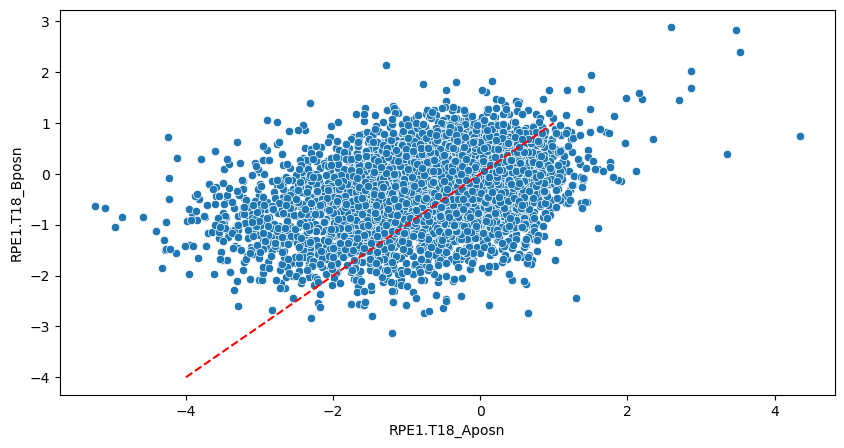

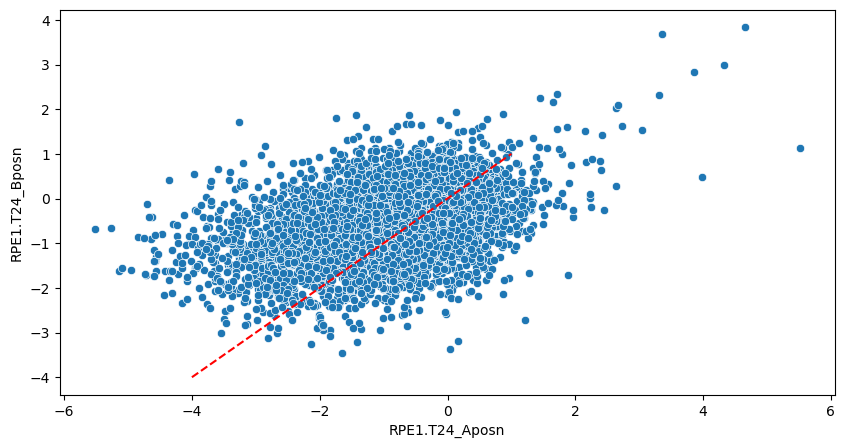

In [95]:
for cell in cells:
    f, ax = pyplot.subplots(figsize=(10,5))
    sns.scatterplot(data=smf_gene, x=cell + '_Aposn',y=cell + '_Bposn', ax=ax)
    plot([-4,1],[-4,1],'r--')
    print(cell + ': ' + str( stats.pearsonr( smf_gene[ cell + '_Aposn' ], smf_gene[cell + '_Bposn' ])) ) 

In [96]:
for cell in cells:
    smf_gene[cell] = smf_gene[ [cell + '_Aposn', cell + '_Bposn'] ].mean(1)
    smf_gene.drop( [cell + '_Aposn', cell + '_Bposn'], axis=1, inplace=True )
    
smf_gene

,RPE1.T18,RPE1.T24
GENE1,,
AAAS,-0.489875,-0.712064
AACS,0.018542,0.008287
AAGAB,-0.948846,-1.300465
AAMDC,0.111023,0.025381
AAMP,-1.198356,-1.515660
...,...,...
ZWINT,0.171266,0.037264
ZYG11B,-0.284456,-0.551715
ZYX,-1.049974,-1.248710


In [97]:
pairs = fc_merge[(fc_merge['GENE1'] != "control") & (fc_merge['GENE2'] != "control")] # These are all experiments without control,
pairs =  pairs[["GENE1", "GENE2"]]
pairs =pairs.drop_duplicates(keep='first')
pairs.insert(2, "GENE1_GENE2",np.tile("ZZ",len(pairs)), True)



pairs.columns
for ind in pairs.index:
    g1 = pairs.loc[ind, 'GENE1']
    g2 = pairs.loc[ind, 'GENE2']
    newval = g1 + "_" + g2
    if g1 > g2:
        newval = g2 + "_" + g1
    pairs.loc[ind,"GENE1_GENE2"] = newval

    
pairs
print(len(pairs))
pairs.drop_duplicates(subset="GENE1_GENE2", keep="first",inplace = True)
print(len(pairs))
pairs

1376
688


,GENE1,GENE2,GENE1_GENE2
Column1,,,
58609,SLC16A1,SLC16A3,SLC16A1_SLC16A3
58655,MDM4,TP53,MDM4_TP53
58701,APC,CTNNB1,APC_CTNNB1
58747,MAP2K1,BRAF,BRAF_MAP2K1
58793,CDK2,CCNE1,CCNE1_CDK2
...,...,...,...
89239,ZDHHC18,ZDHHC14,ZDHHC14_ZDHHC18
89285,ZFR,ZFR2,ZFR_ZFR2
89319,ZFYVE16,ZFYVE9,ZFYVE16_ZFYVE9


In [98]:
fc_merge.columns
dLFC = pd.DataFrame( index=list(pairs.GENE1 + "_" + pairs.GENE2), columns=fc_merge.columns[2:], dtype=float)
dLFC


,RPE1.T18,RPE1.T24
SLC16A1_SLC16A3,NaN,NaN
MDM4_TP53,NaN,NaN
APC_CTNNB1,NaN,NaN
MAP2K1_BRAF,NaN,NaN
CDK2_CCNE1,NaN,NaN
...,...,...
ZDHHC18_ZDHHC14,NaN,NaN
ZFR_ZFR2,NaN,NaN
ZFYVE16_ZFYVE9,NaN,NaN
ZMIZ2_ZMIZ1,NaN,NaN


In [99]:
smf = smf_gene
for pair_idx in pairs.index:
    g1 = pairs.loc[pair_idx].GENE1
    g2 = pairs.loc[pair_idx].GENE2
    expt_idx  = list( where( ( (fc_merge.GENE1==g1) & (fc_merge.GENE2==g2) )  | ( (fc_merge.GENE1==g2) & (fc_merge.GENE2==g1)  ))[0] )
    
    if ( len(expt_idx)==0 ):
        continue
    smf_sum = smf.loc[g1] + smf.loc[g2]
    expt = fc_merge.iloc[ expt_idx ]
    genepair = g1 + "_" + g2
    dLFC.loc[genepair] = expt.median(0,numeric_only=True) - smf_sum

In [100]:
zdLFC = pd.DataFrame( index=dLFC.index, columns=dLFC.columns, dtype=float ) 
zdLFC.head()

,RPE1.T18,RPE1.T24
SLC16A1_SLC16A3,NaN,NaN
MDM4_TP53,NaN,NaN
APC_CTNNB1,NaN,NaN
MAP2K1_BRAF,NaN,NaN
CDK2_CCNE1,NaN,NaN


In [101]:

percentile =  2.5
for col in zdLFC.columns:
    #print(col)
    top = np.percentile( dLFC.loc[:,col], percentile)
    bot = np.percentile( dLFC.loc[:,col], 100-percentile)
    #print(top,bot)
    mu = dLFC.iloc[ where( (dLFC[col]>top) & (dLFC[col]<bot))[0] ][col].mean() # This is because our dist is truncated normal
    std = dLFC.iloc[ where( (dLFC[col]>top) & (dLFC[col]<bot))[0] ][col].std()
    #print(mu, std)
    zdLFC[col] = (dLFC[col] - mu) / std

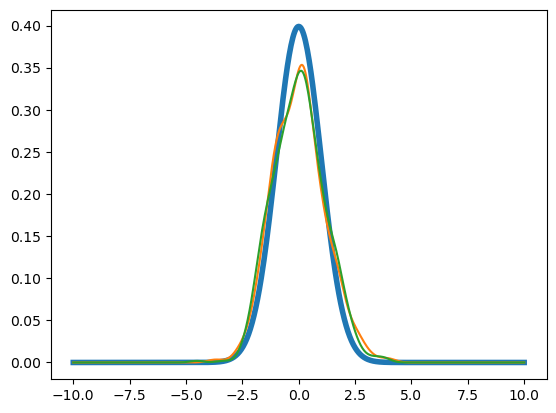

In [102]:
xx = linspace(-10,10,500)
kde_RPE1T18 = stats.gaussian_kde( zdLFC['RPE1.T18'] )
kde_RPE1T24 = stats.gaussian_kde( zdLFC['RPE1.T24'] )

plot( xx, stats.norm.pdf( xx), label='normal', linewidth=4 )
plot( xx, kde_RPE1T18.evaluate(xx), label='RPE1.T18')
plot( xx, kde_RPE1T24.evaluate(xx), label='RPE1.T24')


In [103]:
thresh = -3
RPE1_T18 = set( zdLFC.index[(zdLFC['RPE1.T18'] < thresh) |  (zdLFC['RPE1.T24'] < thresh)  ])
zdLFC.index[(zdLFC['RPE1.T18'] < thresh)]
RPE1_T18

{'ROCK2_ROCK1', 'SEC23A_SEC23B'}

In [104]:
def reindex_alphbetically(df):
    result = []
    for index, row in df.iterrows():
        a, b = index.split('_')
        if a < b:
            result.append(f'{a}_{b}')
        else:
            result.append(f'{b}_{a}')
    
    
    return(result)


zdLFC.index = reindex_alphbetically(zdLFC)
zdLFC.to_csv("zdLFC Output/ChymeraRPE1.csv", index=True)  # Set index=False to exclude the index column